## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Standardisation**.

=================================================================

## Standardisation


Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, **standardising a variable does not normalize the distribution of the data** and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. 

Note that **the mean values are not centered at zero, and the standard deviations are not scaled to 1**.

When standardising the data set, we need to first identify the mean and standard deviation of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

### Standardisation

The StandardScaler from scikit-learn removes the mean and scales the data to unit variance. Plus, it learns and stores the parameters needed for scaling. Thus, it is top choice for this feature scaling technique.

On the downside, you can't select which variables to scale directly, it will scale the entire data set.

In [5]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([ 3.86666741e+00,  2.86187016e+01,  5.42340368e+00,  1.09477484e+00,
        1.42515732e+03,  3.04051776e+00,  3.56300934e+01, -1.19566647e+02])

In [7]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([1.89109236e+00, 1.25962585e+01, 2.28754018e+00, 4.52736275e-01,
       1.14954037e+03, 6.86792905e+00, 2.14004647e+00, 2.00651732e+00])

In [8]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.78,-2.19,-2.00,-1.68,-1.24,-0.33,-1.44,-2.38
25%,-0.69,-0.84,-0.42,-0.20,-0.56,-0.09,-0.79,-1.11
50%,-0.17,0.03,-0.08,-0.10,-0.23,-0.03,-0.64,0.54
75%,0.46,0.67,0.27,0.01,0.26,0.03,0.97,0.78
max,5.89,1.86,55.57,72.83,29.80,86.88,2.95,2.62


As expected, the mean of each variable is now centered at zero and the standard deviation is 1. 

Note that the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers.

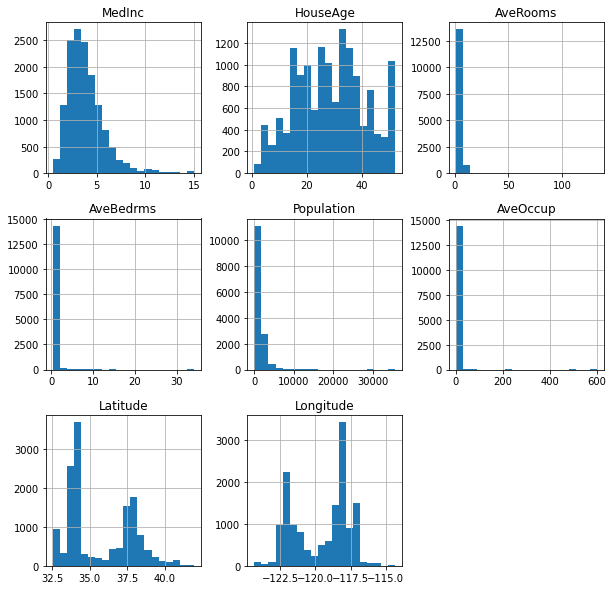

In [9]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

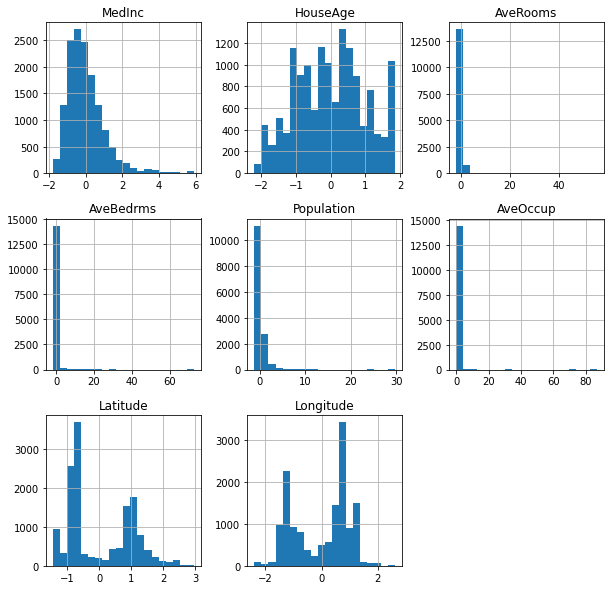

In [10]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

Note from the above plots how standardisation centered all the distributions at zero, but it preserved their original distribution.